In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [161]:
h_ = 1
m = 1
omega = 1
x = np.linspace(-5,5,1000)

In [162]:
def Potencial(x):
    return 0.5*m*(omega**2)*x**2

In [163]:
def Numerov(x,E,Potencial):
    h = x[1]-x[0]
    psi = np.zeros_like(x)
    R = (2*m/(h_**2))*(Potencial(x)-E)
    psi[0]=0
    psi[1]=1e-5
    for i in range(2,len(x)):
        psi[i] = ( 2*(1+((5*h**2)/12)*R[i-1])*psi[i-1]-(1-(h**2/12)*R[i-2])*psi[i-2] ) / (1-(h**2/12)*R[i])

    norm = np.trapz(psi**2,x)
    psi /= np.sqrt(norm)
    return psi

In [164]:
def EigenValues(Potencial):
    val_propios = []
    E = 0.0
    while len(val_propios) < 6 :  # Puedes ajustar el rango de búsqueda según tus necesidades
        psi = Numerov(x, E,Potencial)
        if psi[-1] * Numerov(x, E + 0.001,Potencial)[-1] < 0:
            val_propios.append(E)
        E += 0.001
        #print(val_propios)
        #print(E)
    return val_propios

In [165]:
#Puede demorar poco mas de 1 minuto
EigenValues = EigenValues(Potencial)
print(EigenValues)

[0.5000000000000003, 1.4999999999999456, 2.4999999999998357, 3.4999999999997256, 4.4999999999998375, 5.500000000000171]


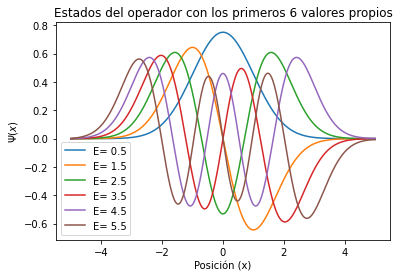

In [166]:
for i, valor_propio in enumerate(EigenValues[:6]):
    phi = Numerov(x, valor_propio,Potencial)
    plt.plot(x, phi, label=f"E= {np.round(valor_propio,1)}")

plt.title("Estados del operador con los primeros 6 valores propios")
plt.xlabel("Posición (x)")
plt.ylabel("$\Psi(x)$")
plt.legend()
plt.show()

In [167]:
def Potencial2(x):
    return -10*np.exp((-x**2)/20)

In [168]:
#Puede demorar poco mas de 1 minuto
En = []
E = -10
while len(En) < 5 :  
    psi = Numerov(x, E,Potencial2)
    if psi[-1] * Numerov(x, E + 0.001,Potencial2)[-1] < 0:
        En.append(E)
    E += 0.001
    #print(En)
    #print(E)
print(En)

[-9.510000000000272, -8.548000000000805, -7.625000000000983, -6.742000000000688, -5.899000000000407]


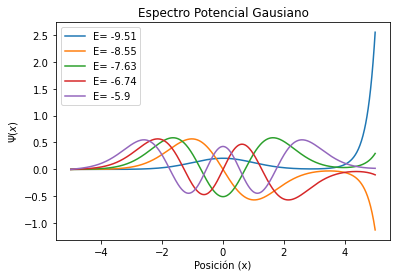

In [169]:
for i, valor_propio in enumerate(En):
    phi = Numerov(x, valor_propio,Potencial2)
    plt.plot(x, phi, label=f"E= {np.round(valor_propio,2)}")

plt.title("Espectro Potencial Gausiano")
plt.xlabel("Posición (x)")
plt.ylabel("$\Psi(x)$")
plt.legend()
plt.show()

In [170]:
def Potencial3(x):
    return -4/((1+x**2)**2)

In [171]:
#Puede demorar poco mas de 1 minuto
En = []
E = 0
while len(En) < 2 :  
    psi = Numerov(x, E,Potencial3)
    if psi[-1] * Numerov(x, E - 0.001,Potencial3)[-1] < 0:
        En.append(E)
    E -= 0.001
    #print(En)
    #print(E)
print(En)

[-0.4250000000000003, -2.470999999999839]


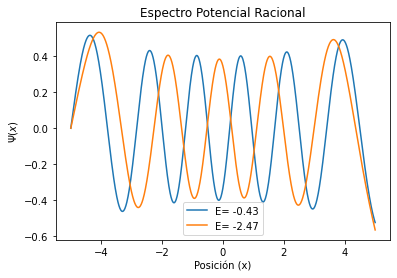

In [172]:
for i, valor_propio in enumerate(En):
    phi = Numerov(x, valor_propio,Potencial2)
    plt.plot(x, phi, label=f"E= {np.round(valor_propio,2)}")

plt.title("Espectro Potencial Racional")
plt.xlabel("Posición (x)")
plt.ylabel("$\Psi(x)$")
plt.legend()
plt.show()